<a href="https://colab.research.google.com/github/sidharth-ds/Natural-Language-Processing-projects/blob/main/Resume_filter_task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing necessary packages:

import numpy as np
import pandas as pd
import re

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score

In [2]:
resumeDataSet = pd.read_csv('UpdatedResumeDataSet.csv' ,encoding='utf-8')  # reading the file
resumeDataSet.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [3]:
print ("Displaying the distinct categories of resume : \n")     # job categories
print (resumeDataSet['Category'].unique())

Displaying the distinct categories of resume : 

['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [4]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category : \n")  # counts in each category
print (resumeDataSet['Category'].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category : 

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64


# Visualizing the categories:

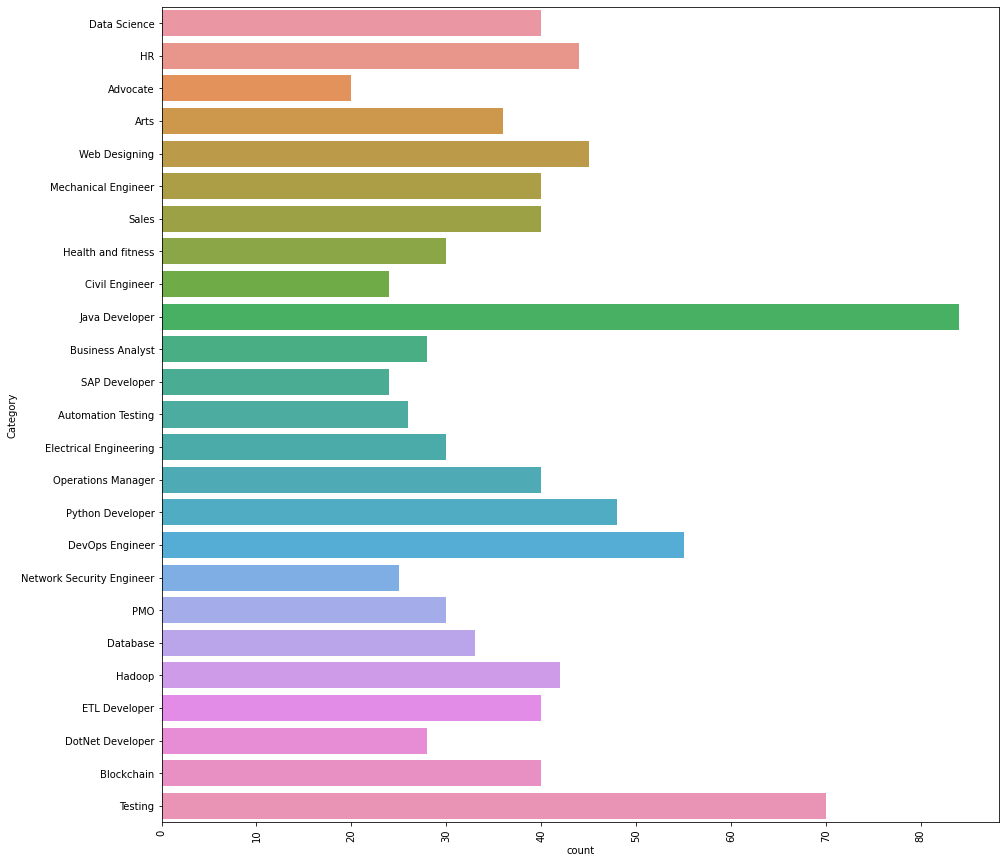

In [5]:
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=resumeDataSet)

***Interpretation of the above:***
* Java developer has the highest applicants followed by testing
* Advocate has the least applicants

# Data Cleaning (NLP):

In [6]:
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
resumeDataSet['cleaned_resume'] = resumeDataSet.Resume.apply(lambda x: cleanResume(x))

# Stop words removal:

In [7]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk import word_tokenize
import string

stop_words = stopwords.words('english')   # for english language

# Making custom list of words to be removed 
add_words = []
# Adding to the list of words
stop_words.extend(add_words)

# Defining a Function to remove stop words 
# take the paragraph, break into words, check if the word is a stop word, remove if stop word, combine the words into a para again

def remove_stopwords(rev):
    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

# Removing stopwords
resumeDataSet['cleaned_resume'] = [remove_stopwords(r) for r in resumeDataSet['cleaned_resume']]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Word cloud: (to visualize the text data)

[('Exprience', 3829), ('months', 3233), ('company', 3130), ('Details', 2967), ('description', 2634), ('1', 2134), ('Project', 1808), ('project', 1579), ('6', 1499), ('data', 1438), ('team', 1424), ('Maharashtra', 1385), ('year', 1244), ('Less', 1137), ('January', 1086), ('using', 1041), ('Skill', 1018), ('Pune', 1016), ('Management', 1010), ('SQL', 990), ('Ltd', 934), ('management', 927), ('C', 896), ('Engineering', 855), ('Education', 833), ('Developer', 806), ('Java', 773), ('2', 754), ('development', 752), ('monthsCompany', 746), ('Pvt', 730), ('application', 727), ('System', 715), ('reports', 697), ('business', 696), ('India', 693), ('requirements', 693), ('I', 690), ('various', 688), ('A', 688), ('Data', 674), ('The', 672), ('University', 656), ('process', 648), ('Testing', 646), ('test', 638), ('Responsibilities', 637), ('system', 636), ('testing', 634), ('Software', 632)]


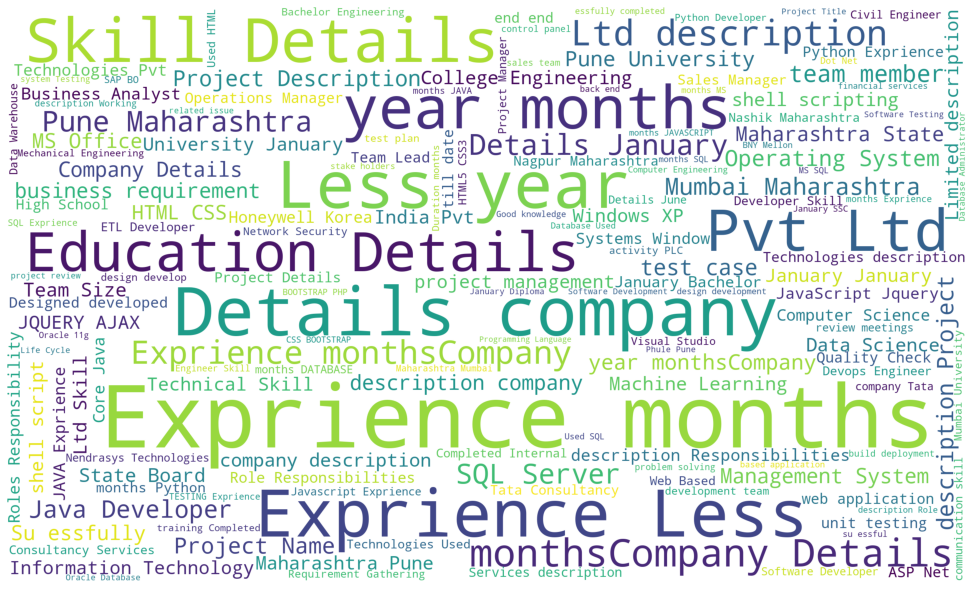

In [8]:
from wordcloud import WordCloud

# frequency of words:    
all_words = ' '.join([text for text in resumeDataSet['cleaned_resume']])
all_words = all_words.split()

wordfreqdist = nltk.FreqDist(all_words)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

# plotting Word Cloud:

all_words = ' '.join([text for text in resumeDataSet['cleaned_resume']])
wc = WordCloud(width = 2500, height = 1500, background_color ='white', min_font_size = 20).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()

# Data Preprocessing:

In [9]:
# Encoding:
le = LabelEncoder()
resumeDataSet['Category']= le.fit_transform(resumeDataSet['Category'])

In [10]:
X = resumeDataSet['cleaned_resume'].values
y = resumeDataSet['Category'].values

# vectorizer
word_vectorizer = TfidfVectorizer(stop_words='english', max_features=1500)
word_vectorizer.fit(X)
X_vectorized = word_vectorizer.transform(X)

# splitting
X_train,X_test,y_train,y_test = train_test_split(X_vectorized,y,random_state=0, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(769, 1500)
(193, 1500)


# Modelling:


In [13]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)

prediction = clf.predict(X_test)  # prediction

# eval metrics:
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))

Accuracy of KNeighbors Classifier on training set: 0.99
Accuracy of KNeighbors Classifier on test set: 0.98

 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       0.82      1.00      0.90         9
           7       1.00      0.71      0.83         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         8
          11       0.90      1.00      0.95         9
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.

***Accuracy of 98% is best***